## Arboles de Decisión

Explicación: Los árboles de decisión dividen los datos en ramas y nodos, haciendo preguntas que llevan a una decisión final. Son fáciles de interpretar y visualizar.

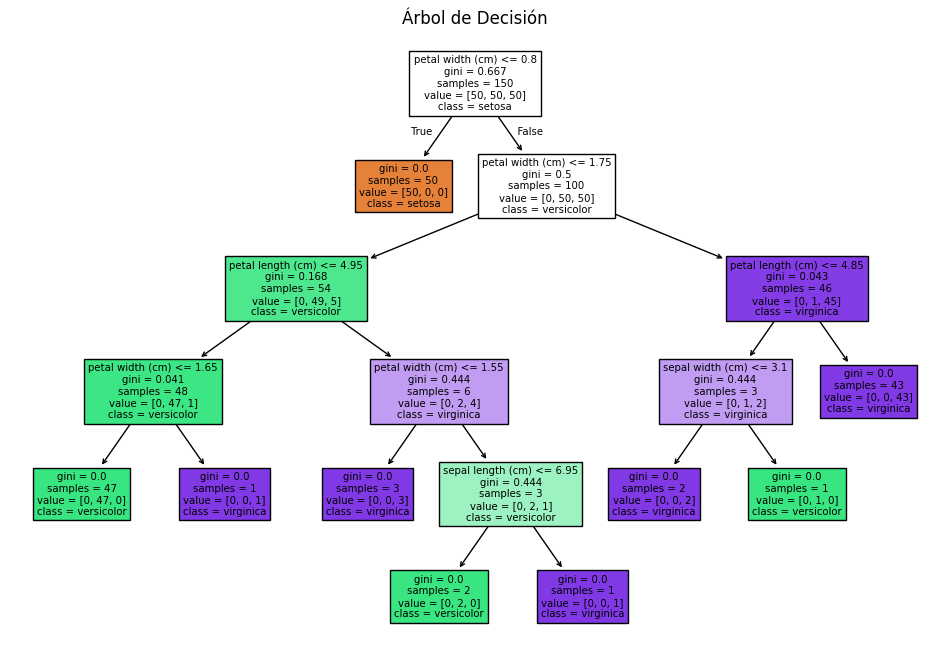

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Cargar dataset
iris = load_iris()
X, y = iris.data, iris.target

# Entrenar modelo
model = DecisionTreeClassifier()
model.fit(X, y)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árbol de Decisión")
plt.show()


## K-Nearest Neighbors (KNN)

Explicación: KNN clasifica un nuevo punto basado en la mayoría de los puntos más cercanos. Es simple y efectivo, pero puede ser lento con grandes datasets.

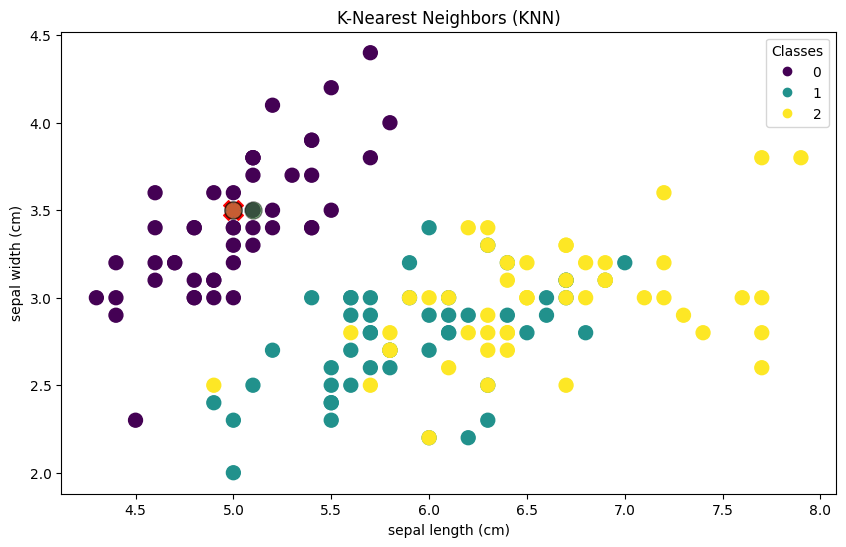

In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Cargar dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # Usar solo las dos primeras características para graficar

# Entrenar modelo
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# Graficar los puntos de datos
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=100)

# Graficar los vecinos más cercanos
test_point = np.array([[5.0, 3.5]])
plt.scatter(test_point[:, 0], test_point[:, 1], c='red', s=200, marker='X')

# Obtener y graficar los vecinos más cercanos
neighbors_indices = model.kneighbors(test_point, return_distance=False)
for i in neighbors_indices[0]:
    plt.scatter(X[i, 0], X[i, 1], edgecolor='black', s=150, alpha=0.5)

plt.title("K-Nearest Neighbors (KNN)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


## Support Vector Machines (SVM)

Explicación: SVM encuentra el hiperplano que separa mejor las clases. Es efectivo en espacios de alta dimensión y con márgenes claros.


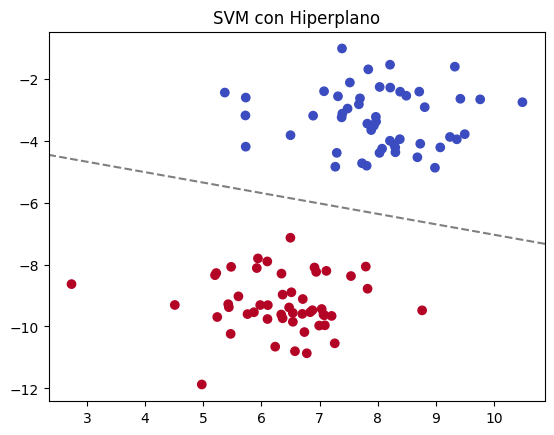

In [4]:
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Cargar dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Entrenar modelo
model = SVC(kernel='linear')
model.fit(X, y)

# Graficar
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear un grid de puntos
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar el hiperplano
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles='--')
plt.title("SVM con Hiperplano")
plt.show()


## Random Forest

Random Forest es un conjunto de árboles de decisión que mejora la precisión al promediar sus predicciones. Reduce el sobreajuste

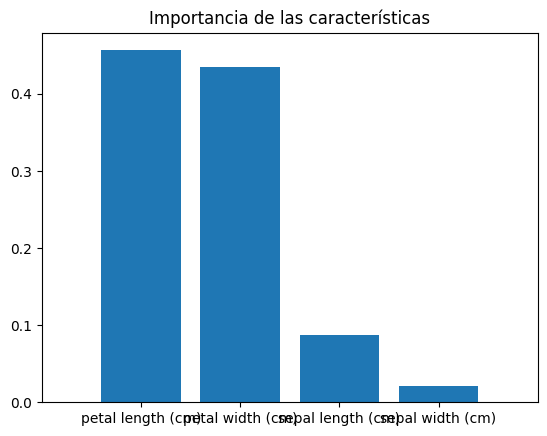

In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Cargar dataset
iris = load_iris()
X, y = iris.data, iris.target

# Entrenar modelo
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Graficar la importancia de las características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [iris.feature_names[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()


## Clustering (K-Means)

Explicación: K-Means agrupa datos en k clústeres basándose en la distancia. Es útil para segmentación y exploración de datos.

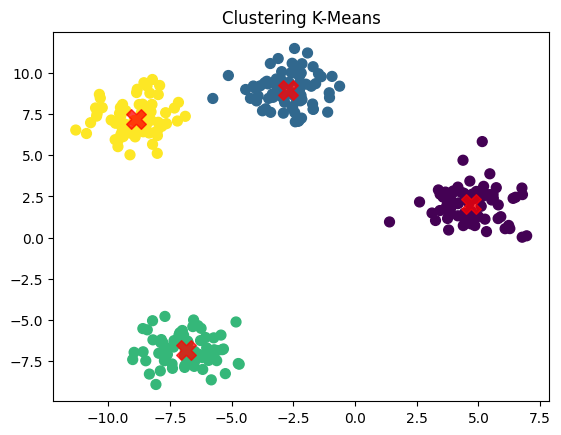

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Crear dataset de ejemplo
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Entrenar modelo K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Graficar resultados
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clustering K-Means")
plt.show()
